In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the databases that we need


In [2]:
# loading in statistics for college players
college_stats = pd.read_csv('all_college_data.csv')

# removing college players that were not drafted
college_stats = college_stats[college_stats['Pick'].notna()]

# dropping all the coloumns that are not going to be used in estimation
cols = ['Player', 'Pick', 'GP', 'MPG', 'WS', 'ORB', 'DRB', 'APG', 'BPG', 'SPG', 'FTM', 'FT%', '3PM', '3P%', 'TS%', 'TOV', 'eFG%', 'ORtg', 'DRtg']
college_stats = college_stats[cols]

# loading in career stats for NBA
# these include averages of culmulative season from 2009 to 2021
# not exactly career averages, but a good enough span for young players
nba_stats = pd.read_csv('NBA_data.csv')

# removing all columns except Player efficiency rating (PER) which is our target
nba_stats = nba_stats[['Player', 'PER']]

# joining college stats on player Name to add target of PER
data = college_stats.set_index('Player').join(nba_stats.set_index('Player'))
data.reset_index(inplace=True)


# making sure we have a PER for every player in our data set, remove those who don't 
data = data[data['PER'].notna()]
data = data.sort_values(by=['Player'])

data.describe()

,Pick,GP,MPG,WS,ORB,DRB,APG,BPG,SPG,FTM,FT%,3PM,3P%,TS%,TOV,eFG%,ORtg,DRtg,PER
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,368.000000,372.000000,368.000000,368.000000,368.000000,372.000000
mean,24.838710,34.239247,31.735215,4.203226,1.998118,4.700457,2.452608,1.013871,1.221290,3.700565,0.732871,1.091048,0.312237,0.586359,2.321183,0.548288,117.243207,94.011685,24.120161
std,15.529671,2.997621,3.568275,3.771676,1.045037,1.666785,1.627153,0.907953,0.526435,1.414923,0.090734,0.933787,0.160687,0.044760,0.631981,0.045582,7.432751,6.892420,4.297764
min,1.000000,22.000000,19.100000,-0.400000,0.170000,1.700000,0.200000,0.000000,0.200000,0.760000,0.295000,0.000000,0.000000,0.488000,0.700000,0.423000,96.400000,54.300000,9.500000
25%,11.000000,32.000000,30.000000,1.200000,1.100000,3.400000,1.300000,0.300000,0.800000,2.700000,0.676750,0.200000,0.277500,0.558000,1.860000,0.515000,112.200000,89.450000,21.100000
50%,24.000000,34.000000,32.000000,3.550000,2.000000,4.500000,1.900000,0.800000,1.200000,3.500000,0.742500,0.900000,0.346000,0.582000,2.280000,0.547500,116.600000,94.000000,23.900000
75%,37.000000,37.000000,34.125000,6.300000,2.700000,5.800000,3.225000,1.400000,1.600000,4.600000,0.799250,1.900000,0.398000,0.616000,2.700000,0.577000,121.625000,98.325000,27.000000
max,60.000000,41.000000,38.400000,19.200000,5.700000,10.500000,9.750000,5.400000,3.000000,8.700000,0.974000,3.900000,1.000000,0.948000,4.400000,0.671000,140.500000,136.200000,42.300000


Cleaning the Data

In [3]:
# filling in means for NaN values in stats
# not many NaN values, because we are taking drafted players only(i.e. high value players, which typically have complete statistics)
# therefore mean is appropriate

# we do not do this for picks over PER cause we already filter out NaN values for them
cols_to_adjust = cols[2:]


for col in cols_to_adjust:
   data[col] = data[col].fillna(data[col].mean())

data.describe() # cleaned data

,Pick,GP,MPG,WS,ORB,DRB,APG,BPG,SPG,FTM,FT%,3PM,3P%,TS%,TOV,eFG%,ORtg,DRtg,PER
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,24.838710,34.239247,31.735215,4.203226,1.998118,4.700457,2.452608,1.013871,1.221290,3.700565,0.732871,1.091048,0.312237,0.586359,2.321183,0.548288,117.243207,94.011685,24.120161
std,15.529671,2.997621,3.568275,3.771676,1.045037,1.666785,1.627153,0.907953,0.526435,1.414923,0.090734,0.933787,0.160687,0.044518,0.631981,0.045336,7.392573,6.855163,4.297764
min,1.000000,22.000000,19.100000,-0.400000,0.170000,1.700000,0.200000,0.000000,0.200000,0.760000,0.295000,0.000000,0.000000,0.488000,0.700000,0.423000,96.400000,54.300000,9.500000
25%,11.000000,32.000000,30.000000,1.200000,1.100000,3.400000,1.300000,0.300000,0.800000,2.700000,0.676750,0.200000,0.277500,0.558000,1.860000,0.515750,112.200000,89.500000,21.100000
50%,24.000000,34.000000,32.000000,3.550000,2.000000,4.500000,1.900000,0.800000,1.200000,3.500000,0.742500,0.900000,0.346000,0.582500,2.280000,0.548144,116.600000,94.011685,23.900000
75%,37.000000,37.000000,34.125000,6.300000,2.700000,5.800000,3.225000,1.400000,1.600000,4.600000,0.799250,1.900000,0.398000,0.616000,2.700000,0.576250,121.600000,98.300000,27.000000
max,60.000000,41.000000,38.400000,19.200000,5.700000,10.500000,9.750000,5.400000,3.000000,8.700000,0.974000,3.900000,1.000000,0.948000,4.400000,0.671000,140.500000,136.200000,42.300000


Correlation Matrix

In [4]:
corr = data.corr().abs()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\gobis\AppData\Local\Temp\ipykernel_19868\2534203441.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs()
C:\Users\gobis\AppData\Local\Temp\ipykernel_19868\2534203441.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Pick,GP,MPG,WS,ORB,DRB,APG,BPG,SPG,FTM,FT%,3PM,3P%,TS%,TOV,eFG%,ORtg,DRtg,PER
Pick,1.00,0.06,0.03,0.44,0.05,0.12,0.08,0.11,0.10,0.19,0.01,0.07,0.00,0.04,0.19,0.03,0.05,0.12,0.17
GP,0.06,1.00,0.14,0.04,0.07,0.10,0.07,0.08,0.08,0.27,0.12,0.01,0.04,0.05,0.22,0.06,0.09,0.28,0.09
MPG,0.03,0.14,1.00,0.03,0.24,0.06,0.47,0.28,0.37,0.45,0.41,0.43,0.23,0.05,0.46,0.23,0.06,0.30,0.06
WS,0.44,0.04,0.03,1.00,0.06,0.09,0.11,0.02,0.15,0.18,0.08,0.00,0.02,0.09,0.09,0.05,0.20,0.08,0.21
ORB,0.05,0.07,0.24,0.06,1.00,0.70,0.62,0.62,0.29,0.01,0.48,0.70,0.45,0.00,0.23,0.17,0.02,0.34,0.40
DRB,0.12,0.10,0.06,0.09,0.70,1.00,0.37,0.57,0.19,0.18,0.26,0.48,0.25,0.00,0.00,0.08,0.03,0.40,0.48
APG,0.08,0.07,0.47,0.11,0.62,0.37,1.00,0.52,0.54,0.16,0.34,0.41,0.28,0.10,0.56,0.29,0.01,0.25,0.14
BPG,0.11,0.08,0.28,0.02,0.62,0.57,0.52,1.00,0.38,0.12,0.46,0.60,0.32,0.03,0.20,0.20,0.09,0.40,0.26
SPG,0.10,0.08,0.37,0.15,0.29,0.19,0.54,0.38,1.00,0.15,0.20,0.33,0.23,0.14,0.31,0.22,0.02,0.07,0.07
FTM,0.19,0.27,0.45,0.18,0.01,0.18,0.16,0.12,0.15,1.00,0.45,0.13,0.08,0.19,0.47,0.13,0.23,0.24,0.50


Splitting the Data

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


# we remove pick as the goal is to determine the value of a college prospect
# therefore their draft order cannot be considered although it has a high correlation
X = data.drop(['Pick','Player', 'PER'], axis = 1)
y = data['PER']

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train

ModuleNotFoundError: No module named 'sklearn'

Preprocessing Data

In [ ]:
from sklearn import preprocessing

# defining an object of MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

# normalize values between 0 and 1 using the training data
X_train_scaled = min_max_scaler.fit_transform(X_train)

# visualizing shape of scaled data
X_train_scaled.shape

Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate

# defining the model as an object of LinearRegression()
lin_model = linear_model.Lasso(alpha=0.1)

# fit the model on the scaled training data
lin_model.fit(X_train_scaled, y_train)

# calculate the coefficient of determination R^2
lin_model.score(X_train_scaled, y_train)

In [ ]:
# Model evaluation with normalization using test set 
min_max_scaler_2 = preprocessing.MinMaxScaler()

X_test_scaled = min_max_scaler_2.fit_transform(X_test)

# calculate the R^2 score
lin_model.score(X_test_scaled, y_test)

0.3657821341659908

In [ ]:
# calculate the predicted values for training data
y_pred_train = lin_model.predict(X_train_scaled)

# visualize the difference between actual and predicted data using scatter plot
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs. Predicted - Train Set")
plt.show()

In [ ]:
# calculate the predicted values for test data
y_pred_test = lin_model.predict(X_test_scaled)

# visualize the difference between actual and predicted data using scatter plot
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs. Predicted - Test Set")
plt.show()

Decision Tree with Grid Search

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create decision tree model instance
clf = DecisionTreeRegressor(random_state=0)
param = {'max_depth': [3,4,5,6,7]}
grid_search = GridSearchCV(clf, param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters for Decision Tree Regression (LDA):", grid_search.best_params_)

#The grid search showed that the max depth parameter should be 6
clf = DecisionTreeRegressor(max_depth=6, random_state=0)
#clf = grid_search.best_estimator_

# Create AdaBoost model instance with decision tree as the base estimator
model = AdaBoostRegressor(base_estimator=clf, random_state=0)
param = {'n_estimators': [25,50,75,100,125,150,175,200], 'learning_rate': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(model, param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters for Decision Tree Regression (LDA):", grid_search.best_params_)
model = grid_search.best_estimator_

# Predict on the training and test set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print the mean squared error and R^2 score for the test set
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))

# Create scatter plot of actual vs predicted values for test set
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


Decision Tree: Did normal grid search with lots of different parameters, yielded MSE of 7.67 and R2 of 0.51

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Following code is done for LDA

#Note testing was done prior, and the best paramaters were the following:
#Max Depth = 5, Learning Rate = 0.001 and N_Estimators = 200
#The following code only runs it for these 3 hyperparameters

#Performs Pruning to find the best maximum depth for the decision tree
treeLDAPruning = DecisionTreeRegressor()
param_grid_lda_pruning = {'max_depth': [3,4,5,6,7,8],
                          'min_samples_leaf': [2,3,4,5,6,7,8],
                          'splitter': ['best', 'random'],
                          'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']} 
grid_search = GridSearchCV(treeLDAPruning, param_grid_lda_pruning, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Outputs value and creates the new decision tree
print("Best parameters for Decision Tree Regression (LDA):", grid_search.best_params_)
bestTreePruning = grid_search.best_estimator_

# Performs boosting
ada = AdaBoostRegressor(base_estimator=bestTreePruning, random_state=42)
param_grid_lda_boosting = {'n_estimators': [50,100,150,200], 'learning_rate': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(ada, param_grid_lda_boosting, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Outputs the best hyperparameters (for learning rate and number of estimators) for boosting
print("Best parameters for AdaBoost (LDA):", grid_search.best_params_)
bestTreeBoosting = grid_search.best_estimator_
# bestTreeBoosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.1)
# bestTreeBoosting.fit(X_train, y_train)

# Evaluates performance of best model on test set
Y_pred_lda = bestTreeBoosting.predict(X_test)
r2_lda = r2_score(y_test, Y_pred_lda)
print("Test set performance LDA (R^2):", r2_lda)
mse_lda = mean_squared_error(y_test, Y_pred_lda)
print("Test set performance LDA (MSE):", mse_lda)

Best parameters for Decision Tree Regression (LDA): {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 5, 'splitter': 'random'}
Best parameters for AdaBoost (LDA): {'learning_rate': 1, 'n_estimators': 150}
Test set performance LDA (R^2): 0.5104263746944502
Test set performance LDA (MSE): 7.679214827375117


Decision Tree: Random search, yielded the worst results

Best parameters for Decision Tree Regression (LDA): {'max_depth': 3}
Best parameters for AdaBoost Regression (LDA): {'learning_rate': 1, 'n_estimators': 125}
Test MSE: 8.2890
Test R^2: 0.4715


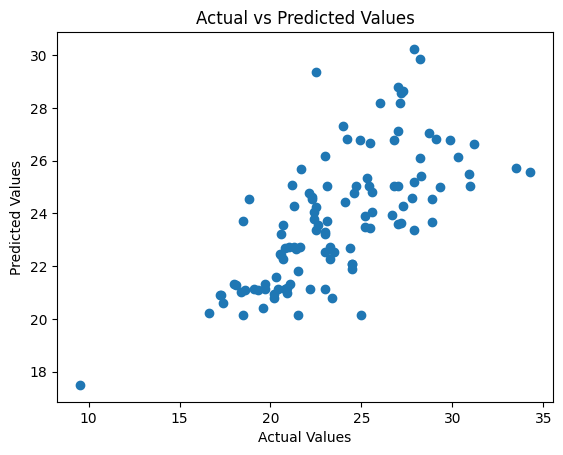

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create decision tree model instance
clf = DecisionTreeRegressor(random_state=0)
param = {'max_depth': [3,4,5,6,7]}
random_search = RandomizedSearchCV(clf, param_distributions=param, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=0)
random_search.fit(X_train, y_train)
print("Best parameters for Decision Tree Regression (LDA):", random_search.best_params_)

# Use the best hyperparameters to create the model
clf = DecisionTreeRegressor(max_depth=random_search.best_params_['max_depth'], random_state=0)

# Create AdaBoost model instance with decision tree as the base estimator
model = AdaBoostRegressor(base_estimator=clf, random_state=0)
param = {'n_estimators': [25,50,75,100,125,150,175,200], 'learning_rate': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(model, param, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters for AdaBoost Regression (LDA):", grid_search.best_params_)

# Use the best hyperparameters to create the model
model = AdaBoostRegressor(base_estimator=clf, n_estimators=grid_search.best_params_['n_estimators'], 
                          learning_rate=grid_search.best_params_['learning_rate'], random_state=0)

# Fit the model on training data and predict on test data
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print the mean squared error and R^2 score for the test set
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))

# Create scatter plot of actual vs predicted values for test set
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


MLP with Grid Search

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Defining the model as an object of MLPRegressor()
mlp_model = MLPRegressor(hidden_layer_sizes = (18,), activation='identity', solver='lbfgs', alpha = 0.0001, max_iter = 100, shuffle=True)

# Different combinations of hyperparameter values
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'adaptive', 'invscaling'],
              'hidden_layer_sizes': [(10,),(11,),(12,),(13,),(14,),(15,),(16,)],
              }

# Grid Search
grid = GridSearchCV(mlp_model, param_grid, refit = True, verbose = 3, scoring='neg_mean_squared_error')

# Fitting the model on the scaled training data
grid.fit(X_train_scaled, y_train)

# Getting the MSE score
print('Testing accuracy (Train): ', grid.score(X_train_scaled, y_train))
print('Validation Accuracy (Train): ', grid.best_score_)

# Getting the MSE score on test set
print('Testing accuracy (Test): ', grid.score(X_test_scaled, y_test))

# Predicted values for training data
y_pred_train = grid.predict(X=X_train_scaled)

# Predicted values for test data
y_pred_test = grid.predict(X=X_test_scaled)
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))
print("Best parameters: ", grid.best_params_)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Defining the model as an object of KNeighborsRegressor() + Fitting with training data
knn_model = KNeighborsRegressor(n_neighbors=85, leaf_size=85, p=2, algorithm='auto').fit(X_train, y_train)

# Getting the MSE score
print('Testing accuracy (Train): ', knn_model.score(X_train_scaled, y_train))

# Getting the MSE score on test set
print('Testing accuracy (Test): ', knn_model.score(X_test_scaled, y_test))

# Predicted values for training data
y_pred_train = knn_model.predict(X=X_train_scaled)

# Predicted values for test data
y_pred_test = knn_model.predict(X=X_test_scaled)
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))